# Online Store Sales Analysis

This notebook analyzes e-commerce sales data from the cleaned dataset.

In [1]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from datetime import datetime

# Set plot style
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 6]
sns.set()

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


## Load and Prepare Data

In [2]:

# Find the most recent combined data file
combined_files = glob.glob("data/cleaned/combined_sales_data_*.csv")

if not combined_files:
    print("No combined dataset found. Run the main analysis script first.")
else:
    # Load the most recent file
    latest_file = max(combined_files, key=os.path.getmtime)
    print(f"Loading dataset: {latest_file}")
    
    # Load the dataset
    df = pd.read_csv(latest_file)
    
    # Convert date to datetime
    if 'invoicedate' in df.columns:
        df['invoicedate'] = pd.to_datetime(df['invoicedate'])
        # Extract date components
        df['year'] = df['invoicedate'].dt.year
        df['month'] = df['invoicedate'].dt.month
        df['day'] = df['invoicedate'].dt.day
        df['dayofweek'] = df['invoicedate'].dt.dayofweek
        df['dayname'] = df['invoicedate'].dt.day_name()
        df['year_month'] = df['invoicedate'].dt.strftime('%Y-%m')
    
    # Preview the data
    print("Data preview:")
    display(df.head())
    print(f"Shape: {df.shape}")


Loading dataset: data/cleaned\combined_sales_data_20250330_222554.csv
Data preview:


,invoiceno,stockcode,description,quantity,invoicedate,price,customerid,country,data_source,totalprice,unitprice,year,month,day,dayofweek,dayname,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,online_retail_II.csv,NaN,NaN,2009,12,1,1,Tuesday,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,online_retail_II.csv,NaN,NaN,2009,12,1,1,Tuesday,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,online_retail_II.csv,NaN,NaN,2009,12,1,1,Tuesday,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,online_retail_II.csv,NaN,NaN,2009,12,1,1,Tuesday,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,online_retail_II.csv,NaN,NaN,2009,12,1,1,Tuesday,2009-12


Shape: (2104628, 17)


## Sales Overview

Total Sales: $21,333,369.09
Number of Orders: 42,840
Number of Customers: 5,881


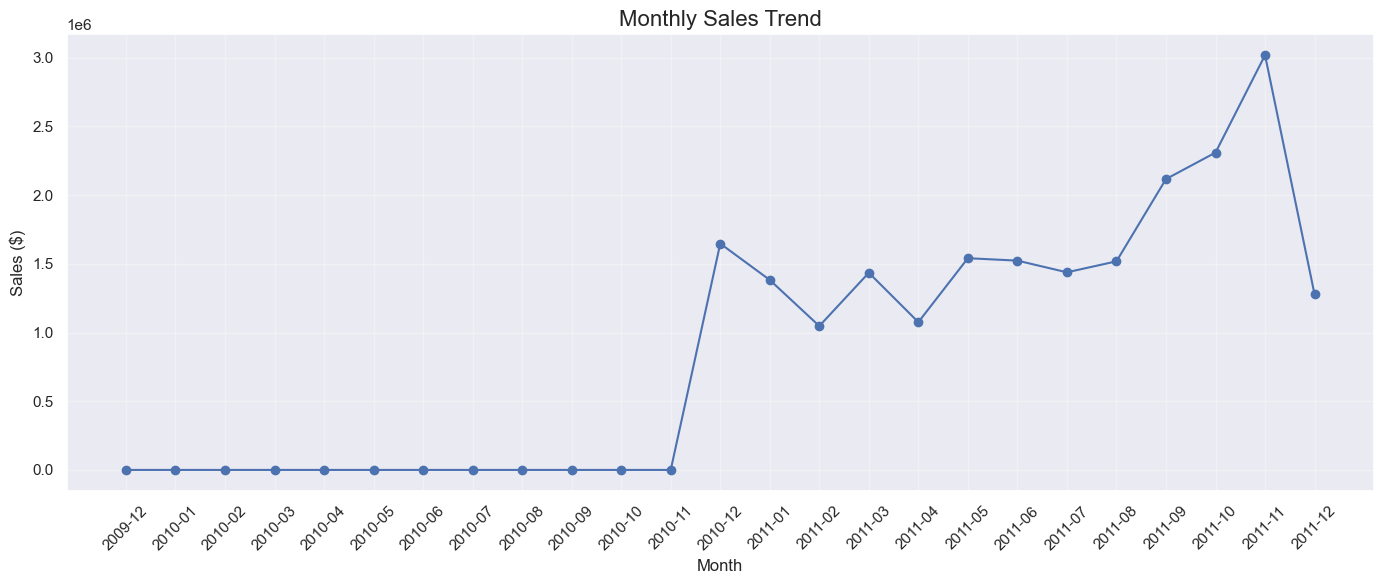

In [3]:

if 'df' in globals():
    # Calculate key metrics
    total_sales = df['totalprice'].sum()
    total_orders = df['invoiceno'].nunique()
    
    # Display metrics
    print(f"Total Sales: ${total_sales:,.2f}")
    print(f"Number of Orders: {total_orders:,}")
    
    if 'customerid' in df.columns:
        total_customers = df['customerid'].nunique()
        print(f"Number of Customers: {total_customers:,}")
    
    # Monthly sales trend
    if 'year_month' in df.columns:
        monthly_sales = df.groupby('year_month')['totalprice'].sum().reset_index()
        monthly_sales = monthly_sales.sort_values('year_month')
        
        plt.figure(figsize=(14, 6))
        plt.plot(monthly_sales['year_month'], monthly_sales['totalprice'], marker='o')
        plt.title("Monthly Sales Trend", fontsize=16)
        plt.xlabel("Month")
        plt.ylabel("Sales ($)")
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


## Product Analysis

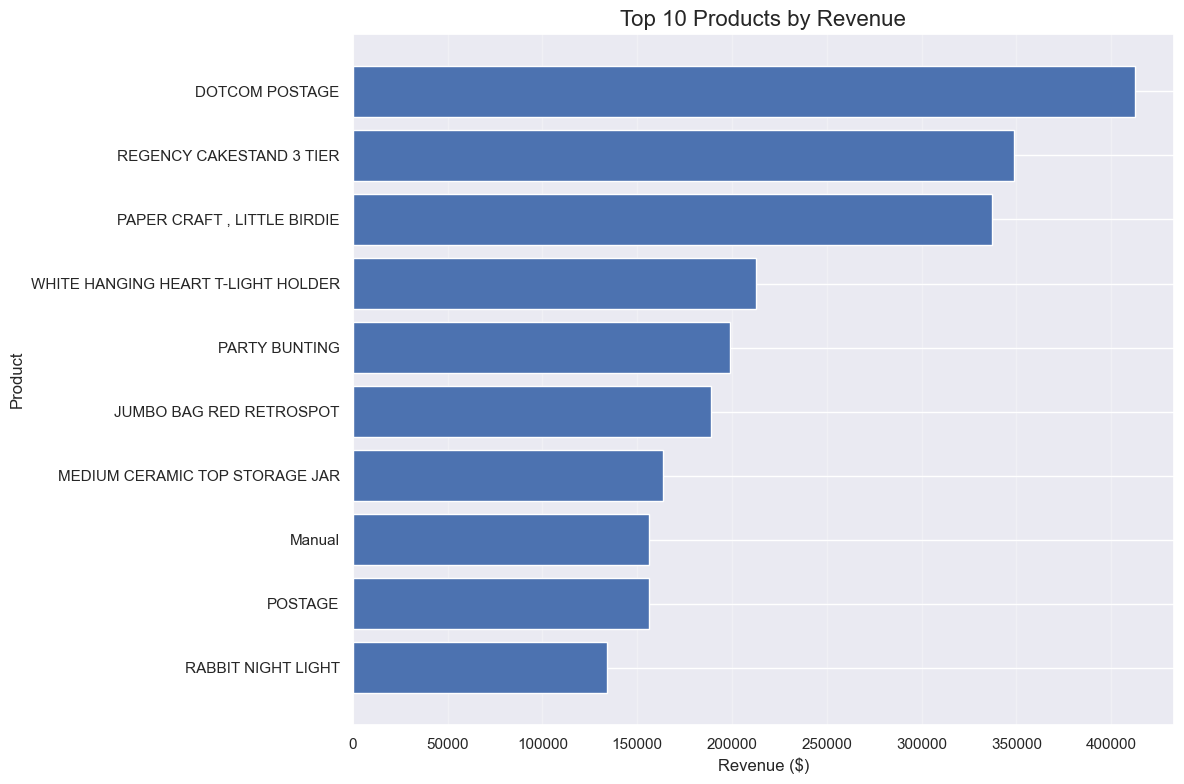

,description,totalprice
1440,DOTCOM POSTAGE,412497.54
3854,REGENCY CAKESTAND 3 TIER,348969.48
3211,"PAPER CRAFT , LITTLE BIRDIE",336939.20
5190,WHITE HANGING HEART T-LIGHT HOLDER,212585.54
3237,PARTY BUNTING,199008.66
2461,JUMBO BAG RED RETROSPOT,188680.10
2771,MEDIUM CERAMIC TOP STORAGE JAR,163401.84
2939,Manual,156225.64
3630,POSTAGE,156203.76
3688,RABBIT NIGHT LIGHT,133929.98


In [4]:

if 'df' in globals() and 'description' in df.columns:
    # Top products by revenue
    top_products = df.groupby('description')['totalprice'].sum().reset_index()
    top_products = top_products.sort_values('totalprice', ascending=False).head(10)
    
    plt.figure(figsize=(12, 8))
    plt.barh(top_products['description'], top_products['totalprice'])
    plt.title("Top 10 Products by Revenue", fontsize=16)
    plt.xlabel("Revenue ($)")
    plt.ylabel("Product")
    plt.gca().invert_yaxis()  # Highest at top
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Display top products
    display(top_products)


## Geographic Analysis

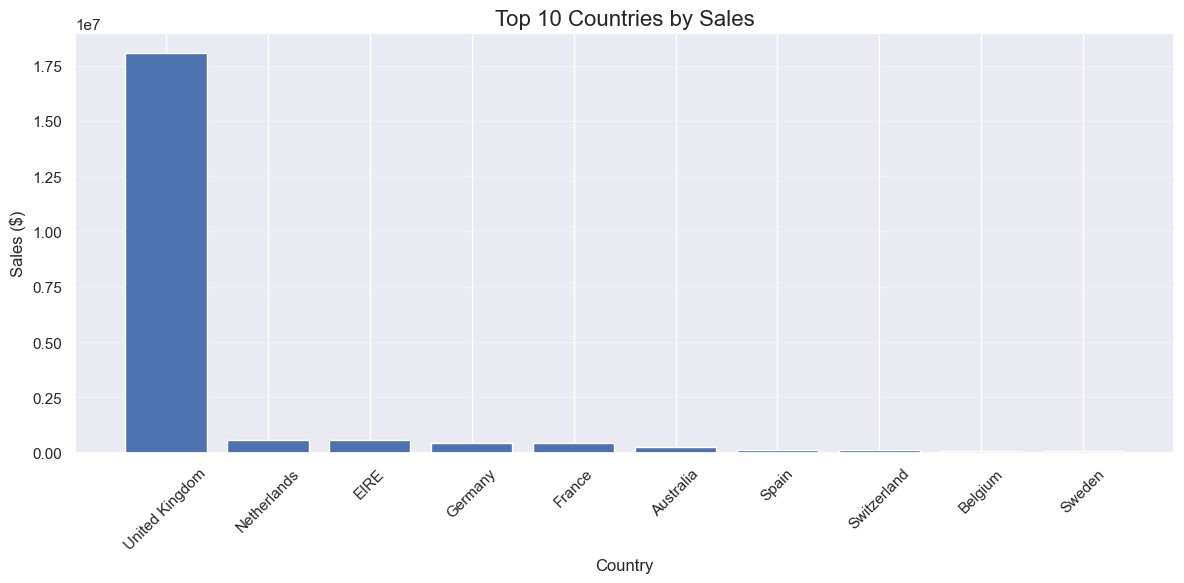

,country,totalprice
40,United Kingdom,1.805044e+07
26,Netherlands,5.708927e+05
11,EIRE,5.669079e+05
15,Germany,4.577343e+05
14,France,4.194302e+05
0,Australia,2.770426e+05
34,Spain,1.231542e+05
36,Switzerland,1.141798e+05
3,Belgium,8.239268e+04
35,Sweden,7.675666e+04


In [5]:

if 'df' in globals() and 'country' in df.columns:
    # Sales by country
    country_sales = df.groupby('country')['totalprice'].sum().reset_index()
    country_sales = country_sales.sort_values('totalprice', ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    plt.bar(country_sales['country'], country_sales['totalprice'])
    plt.title("Top 10 Countries by Sales", fontsize=16)
    plt.xlabel("Country")
    plt.ylabel("Sales ($)")
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Display country sales
    display(country_sales)
